In [11]:
from sbcbinaryformat import Streamer, Writer
import numpy as np
import matplotlib.pyplot as plt

from GetEvent import GetEvent

from ana import AcousticT0 

import importlib

In [12]:
importlib.reload(AcousticT0)

<module 'ana.AcousticT0' from '/exp/e961/app/users/runze/projects/LAr10Ana/ana/AcousticT0.py'>

In [13]:
TEST_RUN = "/exp/e961/data/SBC-25-daqdata/20250611_1/"
TEST_RUN2 = "/exp/e961/data/SBC-25-daqdata/20251103_1/"
TEST_EVT = 0

In [14]:
data = GetEvent(TEST_RUN, TEST_EVT)

In [15]:
data["acoustics"].keys()

dict_keys(['loaded', 'Range', 'DCOffset', 'Waveform', 'sample_rate'])

In [16]:
data["acoustics"]["Range"]

array([[ 2000,  2000, 10000, 10000, 10000, 10000, 10000, 10000]],
      dtype=int16)

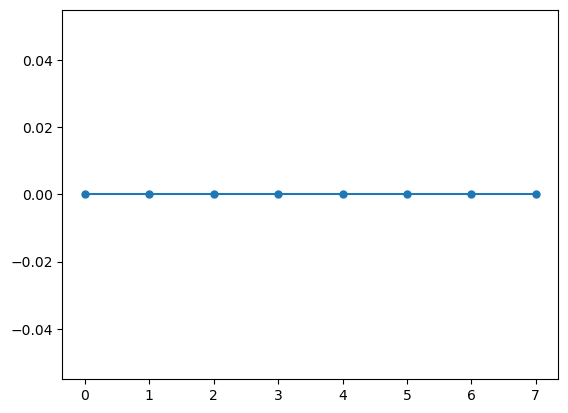

In [17]:
# DC Offset by channel
_ = plt.plot(data["acoustics"]["DCOffset"][0], marker=".", markersize=10)

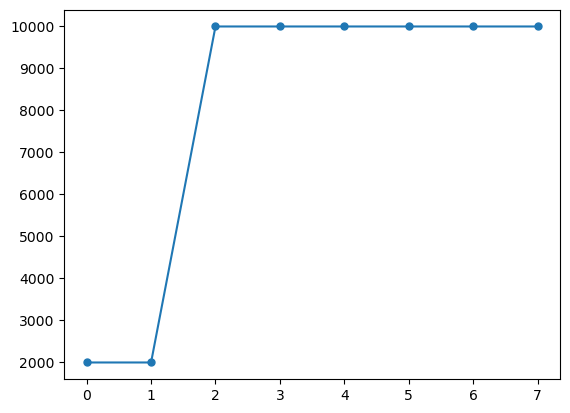

In [18]:
# DC Offset by channel
_ = plt.plot(data["acoustics"]["Range"][0], marker=".", markersize=10)

In [19]:
wvfs = data["acoustics"]["Waveform"]
wvfs.shape

(1, 8, 100001)

In [20]:
np.float64([[1e2, 1e3, 1e4, 1e5]]).shape

(1, 4)

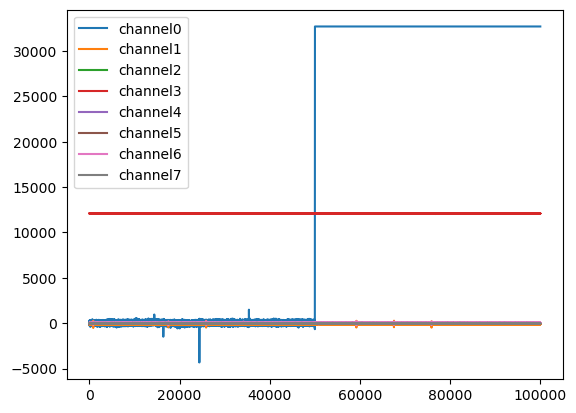

In [29]:
# plot the first triggered waveform in each channel
for channel in range(wvfs.shape[1]):
    plt.plot(wvfs[0, channel, :],label="channel"+str(channel))
plt.legend()

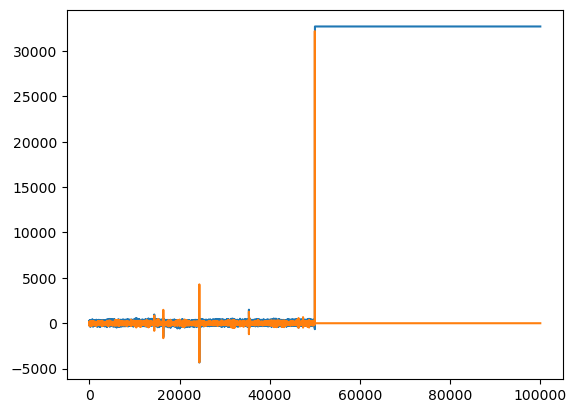

In [30]:
piezo0 = wvfs[0, 0, :]
piezoslope0 = -wvfs[0, 0, 1:]+wvfs[0,0,:-1]
plt.plot(piezo0, label="piezo channel 0")
plt.plot(piezoslope0, label="piezo channel 0 slope")